### **Import Libraries**

Ensure that all the necessary libraries are imported.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.preprocessing import image
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image

### **Mounting the google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load and Preprocess Images**

In [ ]:
data_dir_train = '/content/drive/MyDrive/Data/FinalProject/Dataset/train'
data_dir_test = '/content/drive/MyDrive/Data/FinalProject/Dataset/test'
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_images(data_dir, emotion_labels):
    images = []
    labels = []
    for label in emotion_labels:
        img_dir = os.path.join(data_dir, label)
        if not os.path.exists(img_dir):
            print(f"Directory {img_dir} does not exist")
            continue
        for img_name in os.listdir(img_dir):
            img_path = os.path.join(img_dir, img_name)
            try:
                img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
                img = image.img_to_array(img)
                img = np.repeat(img, 3, axis=-1)  # Convert to RGB
                img = img / 255.0
                images.append(img)
                labels.append(emotion_labels.index(label))
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

X_train, y_train = load_images(data_dir_train, emotion_labels)
X_test, y_test = load_images(data_dir_test, emotion_labels)

# Ensure labels are one-hot encoded
y_train = to_categorical(y_train, num_classes=len(emotion_labels))
y_test = to_categorical(y_test, num_classes=len(emotion_labels))

### **Explore and Visualize Data**

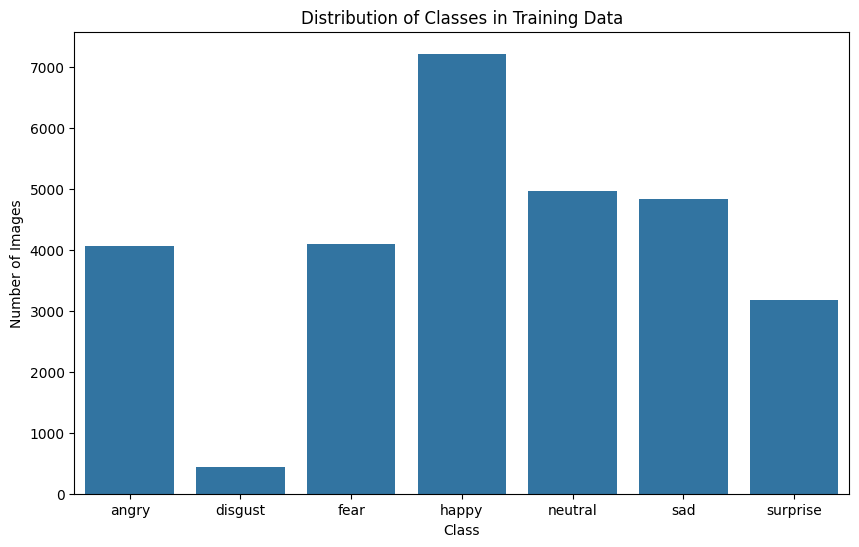

In [ ]:
import pandas as pd

# Create a DataFrame from the labels
labels_df = pd.DataFrame({'label': [emotion_labels[label] for label in np.argmax(y_train, axis=1)]})

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=labels_df, order=emotion_labels)
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(ticks=np.arange(len(emotion_labels)), labels=emotion_labels)
plt.show()

### **Sample Images: Displays a few images from each class.**

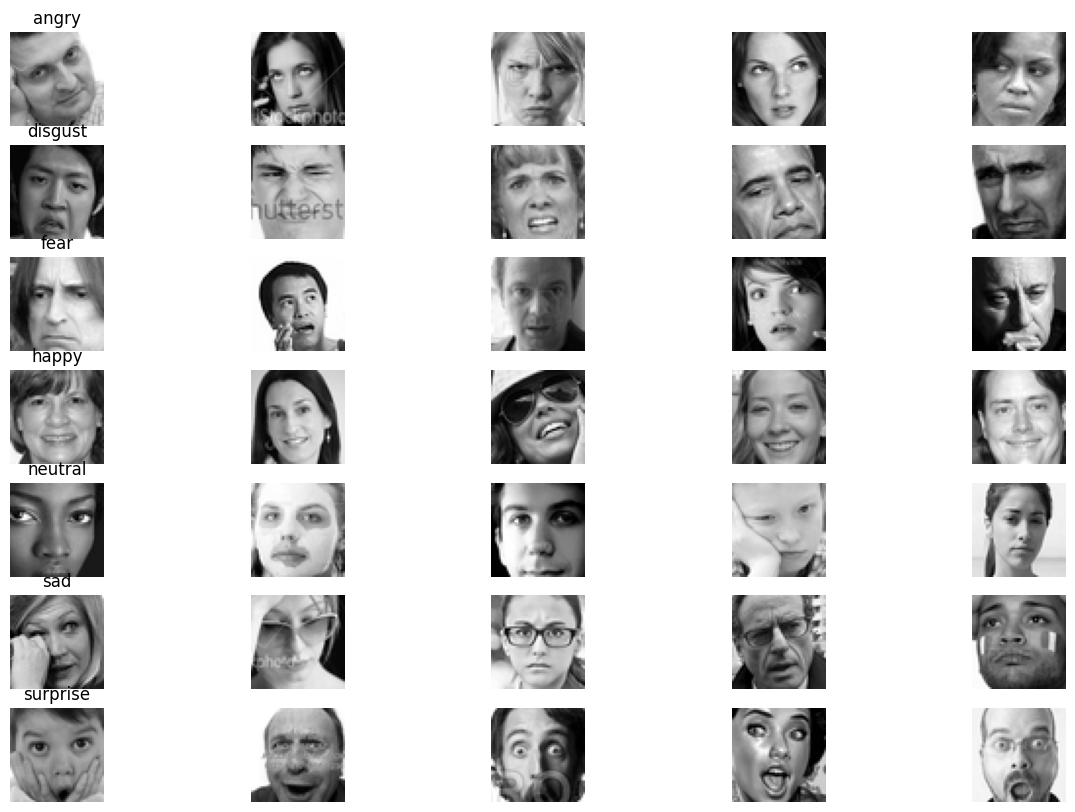

In [ ]:
def display_sample_images(X, y, emotion_labels, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i, label in enumerate(emotion_labels):
        label_indices = np.where(np.argmax(y, axis=1) == i)[0]
        sample_indices = np.random.choice(label_indices, num_samples, replace=False)
        for j, idx in enumerate(sample_indices):
            plt.subplot(len(emotion_labels), num_samples, i*num_samples + j + 1)
            gray_image = np.mean(X[idx], axis=-1)  # Convert RGB to grayscale by averaging the channels
            plt.imshow(gray_image, cmap='gray')
            plt.axis('off')
            if j == 0:
                plt.title(label)
    plt.show()

# Display sample images
display_sample_images(X_train, y_train, emotion_labels)


### **Image Dimensions: Verifies the dimensions of the images.**

In [ ]:
print(f"Image shape: {X_train[0].shape}")


Image shape: (48, 48, 3)


### **Mean and Standard Deviation of Pixel Values: Provides statistics on the pixel values.**

In [ ]:
mean_pixel_value = np.mean(X_train)
std_pixel_value = np.std(X_train)
print(f"Mean pixel value: {mean_pixel_value}")
print(f"Standard deviation of pixel values: {std_pixel_value}")


Mean pixel value: 0.5077813863754272
Standard deviation of pixel values: 0.25497347116470337


### **Image Intensity Distribution: Displays the intensity distribution of a sample image.**

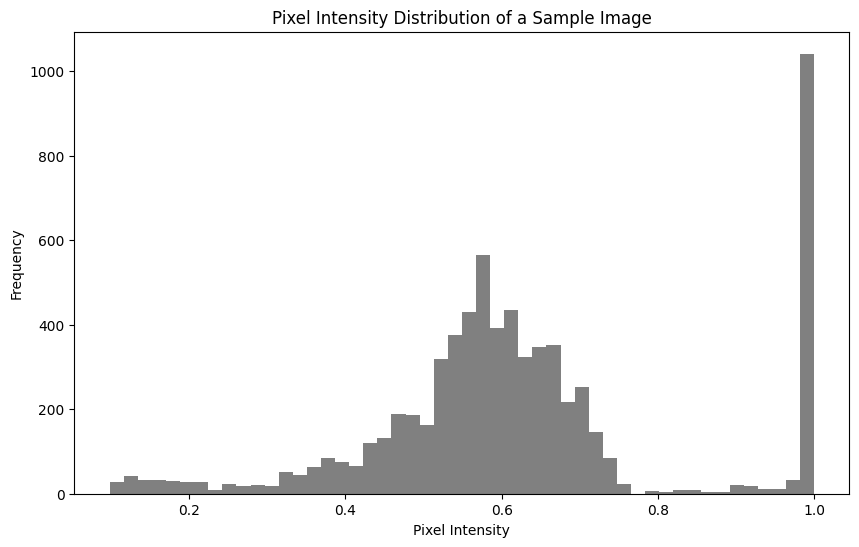

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(X_train[0].flatten(), bins=50, color='gray')
plt.title('Pixel Intensity Distribution of a Sample Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


### **Augmentation Examples: Shows examples of augmented images.**

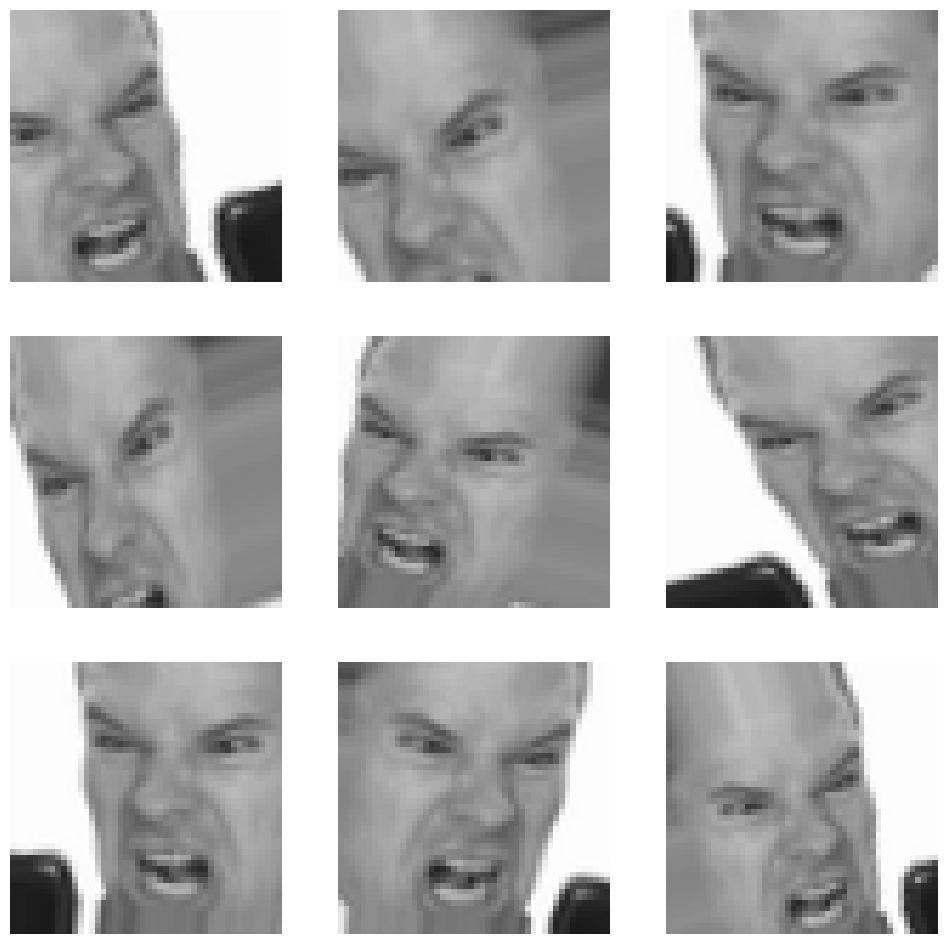

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Prepare a single image for augmentation
sample_image = X_train[0].reshape(1, 48, 48, 3)  # Adjust the shape to (1, 48, 48, 3) for RGB

# Generate augmented images
aug_iter = datagen.flow(sample_image)

# Visualize the augmented images
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = next(aug_iter)  # Use the Python's built-in next() function
    image_augmented = batch[0]
    plt.imshow(image_augmented)
    plt.axis('off')
plt.show()


### **Correlation Matrix of Pixel Values: Visualizes the correlation between pixel values in a sample image.**

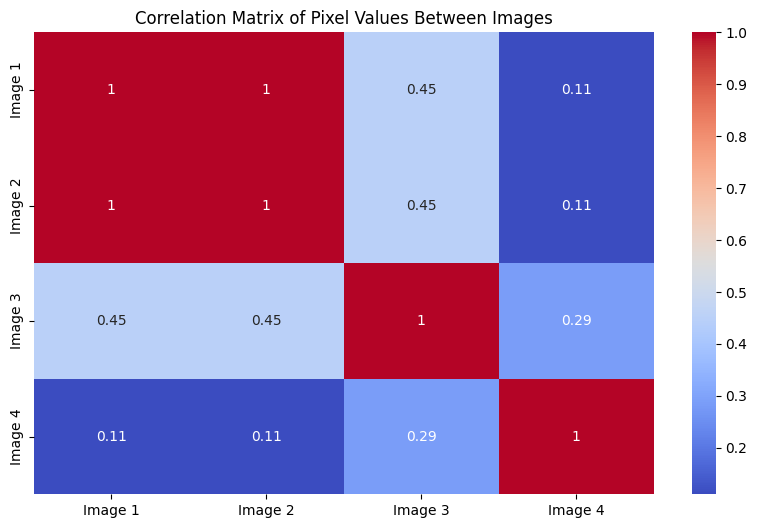

In [ ]:
# Select a few images (let's say 4 for simplicity)
images = [np.mean(X_train[i], axis=-1).flatten() for i in range(4)]  # Convert each image to grayscale and flatten

# Calculate the correlation matrix between these images
correlation_matrix = np.corrcoef(images)

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=['Image 1', 'Image 2', 'Image 3', 'Image 4'], yticklabels=['Image 1', 'Image 2', 'Image 3', 'Image 4'])
plt.title('Correlation Matrix of Pixel Values Between Images')
plt.show()